In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
#import seaborn as sns
#from keras.layers import Dense
import matplotlib.pyplot as plt
#from keras.optimizers import SGD
#from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
#from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [79]:
maxlen = 60
step = 3

sentences = []

next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

print('Number of sequences:', len(sentences))

chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
char_indices = dict((char, chars.index(char)) for char in chars)

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Number of sequences: 200281
Unique characters: 59
Vectorization...


In [149]:
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen,1)))
model.add(layers.Dense(1))
optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='mse', optimizer=optimizer)
model.fit(x, y, batch_size=128, epochs=2)

Epoch 1/2
529/529 [==============================] - 9s - loss: 0.0357      
Epoch 2/2
529/529 [==============================] - 8s - loss: 6.7867e-08     


In [22]:
X = pd.read_csv("//bvt-fs-01//Users$//jwwilson//Documents//Historical//DAT_MT_EURUSD_M1_201801.csv",header=None)
X.columns = ["Date","Time","Open","High","Low","Close","unused"]

In [88]:
#create segments "sentences"
maxlen = 360
step = 60
close = X[["Close"]].values
returns = [1]
returns = [0]
for j in range(1,len(close)):
    returns.append(close[j]-close[j-1])
returns = np.array(returns)
    
sentences = []
next_chars = []

for i in range(0, len(returns) - maxlen, step):
    sentences.append(returns[i: i + maxlen])
    next_chars.append(returns[i + maxlen])

print('Number of sequences:', len(sentences))

print('Vectorization...')
x = np.array(sentences)
y = np.array(next_chars)


Number of sequences: 529
Vectorization...


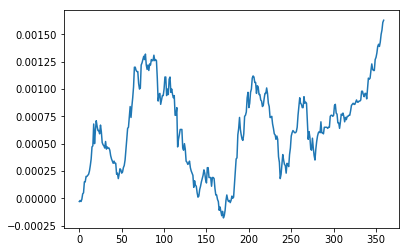

In [69]:
plt.plot(np.cumsum(x[2,:]))

In [50]:
returns = [0]
for j in range(1,len(close)):
    returns.append(close[j]-close[j-1])
returns = np.array(returns)

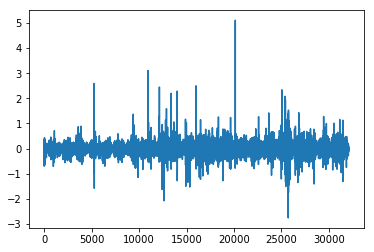

In [52]:
plt.plot(returns*1000)

In [96]:
 model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [92]:
x  = x.reshape(x.shape[0],x.shape[1],1)

In [93]:
x.shape

(529, 360, 1)

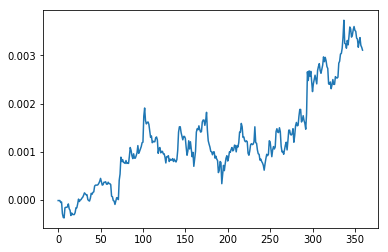

In [104]:
start_index = random.randint(0, len(returns) - maxlen - 1)
generated_text = returns[start_index: start_index + maxlen]
plt.plot(np.cumsum(generated_text))

In [152]:
start_index = random.randint(0, len(returns) - maxlen - 1)
starting_text = returns[start_index: start_index + maxlen]
generated_text = starting_text
for i in range(100):
    model_input = (generated_text[i:]).reshape(1,starting_text.shape[0],1)
    next_char = model.predict(model_input, verbose=0)[0]
    generated_text = np.append(generated_text,next_char)



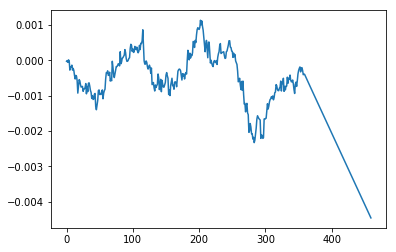

In [153]:
plt.plot((np.cumsum(generated_text)))

In [129]:
generated_text.shape

(360,)

In [133]:
l

array([  1.60000000e-04,   3.80000000e-04,  -1.20000000e-04,
        -3.00000000e-05,   1.00000000e-05,   1.00000000e-04,
         8.00000000e-05,   9.00000000e-05,  -1.50000000e-04,
         9.00000000e-05,  -1.00000000e-05,  -8.00000000e-05,
         0.00000000e+00,   0.00000000e+00,   5.00000000e-05,
        -5.00000000e-05,  -1.10000000e-04,  -1.00000000e-04,
         1.00000000e-05,  -1.00000000e-05,   0.00000000e+00,
        -5.00000000e-05,  -2.00000000e-05,   4.00000000e-05,
         0.00000000e+00,   7.00000000e-05,   2.20000000e-04,
        -8.00000000e-05,  -5.00000000e-05,   9.00000000e-05,
        -1.10000000e-04,  -1.10000000e-04,   1.40000000e-04,
        -3.00000000e-05,   0.00000000e+00,  -1.20000000e-04,
        -9.00000000e-05,   0.00000000e+00,   1.20000000e-04,
         2.30000000e-04,   4.00000000e-05,   2.00000000e-05,
        -1.00000000e-05,   6.00000000e-05,  -1.00000000e-05,
        -1.00000000e-05,  -2.00000000e-05,   2.00000000e-05,
         1.30000000e-04,

In [134]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


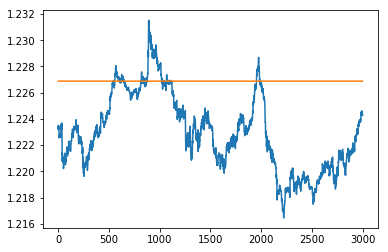

In [259]:
maxlen = 1000
#start_index = random.randint(0, len(returns) - maxlen - 1)
starting_text = close[start_index: start_index + maxlen]
h1 = np.histogram(starting_text,200)
max_r = (h1[1])[np.argmax(h1[0])]
xx = range(0,maxlen*3)
full_text = close[start_index: start_index + 3*maxlen]
resistance = np.zeros(3*maxlen)
for i in range(0,3*maxlen):
    resistance[i] = max_r
plt.plot(xx,full_text,xx,resistance)  

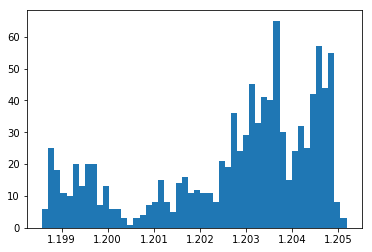

In [248]:
h1 = plt.hist(starting_text,bins = 50)

In [232]:
h1 = np.histogram(starting_text,50)

In [233]:
h1


(array([ 33,  88,  91,  93,  81,  30,  38,  82, 105,  86,  48,  44,  34,
         39,  35,  20,  10,  12,   3,   1,   6,   5,   1,   0,   1,   2,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   6,   2,   5,   3,
          3,  10,  15,  16,  29,  50,  28,  19,  14,   7,   4], dtype=int64),
 array([ 1.20283  ,  1.2030458,  1.2032616,  1.2034774,  1.2036932,
         1.203909 ,  1.2041248,  1.2043406,  1.2045564,  1.2047722,
         1.204988 ,  1.2052038,  1.2054196,  1.2056354,  1.2058512,
         1.206067 ,  1.2062828,  1.2064986,  1.2067144,  1.2069302,
         1.207146 ,  1.2073618,  1.2075776,  1.2077934,  1.2080092,
         1.208225 ,  1.2084408,  1.2086566,  1.2088724,  1.2090882,
         1.209304 ,  1.2095198,  1.2097356,  1.2099514,  1.2101672,
         1.210383 ,  1.2105988,  1.2108146,  1.2110304,  1.2112462,
         1.211462 ,  1.2116778,  1.2118936,  1.2121094,  1.2123252,
         1.212541 ,  1.2127568,  1.2129726,  1.2131884,  1.2134042,  1.21362  ]))

In [225]:
resistance.shape

()

In [210]:
(h1[1])[np.argmax(h1[0])]

1.2056026